# Metal Evolution

#### As Sam Dunn said in his documentary "Metal Evolution": "Metal is more than music, it's a culture of outsiders than has been evolve during the last ~ 50 years into dozens of subgenres". Let´s take a look of how we got here.

In [1]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing

import os
print(os.listdir("../input"))

['world_population_1960_2015.csv', 'metal_bands_2017.csv']


## Reading the Data

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

bd = pd.read_csv('../input/metal_bands_2017.csv', encoding='latin-1')
bd.head()

metal_bands_2017.csv
world_population_1960_2015.csv



,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [3]:
bd.shape

(5000, 7)

#### Let's get rid off the first column

In [4]:
bands = bd.iloc[:,1:7]
bands.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


# Into the Infernal Regions of the Dataset

#### Let's see if we have duplicated bands

In [5]:
bands.band_name.duplicated().sum()

51

#### Yes, we have 51 duplicated bands

#### Take a look at duplicated bands. Pay special attention to their indexes

In [6]:
bands.loc[bands.band_name.duplicated(keep='first'), :]

,band_name,fans,formed,origin,split,style
50,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
51,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
52,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
53,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
54,Amon Amarth,3054,1988,Sweden,-,Melodic death
55,Slayer,2955,1981,USA,1981,Thrash
56,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
57,Dream Theater,2329,1985,USA,1985,Progressive
58,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
59,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


In [7]:
bands.loc[bands.band_name.duplicated(keep='last'), :]

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive
8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


#### We need to **Kill 'Em All**

In [8]:
band = bands.drop_duplicates(keep='first')
band.shape

(4950, 6)

# Split Sub-Genres

#### Some bands have up to 6 associated subgenres.

In [9]:
# new columns with splitted styles 
Genre = band['style'].str.split(',', n = 5, expand = True)

band['main_genre'] = Genre[0]
band['secondary_genre'] = Genre[1]
band['genre_3'] = Genre[2]
band['genre_4'] = Genre[3]
band['genre_5'] = Genre[4]
band['genre_6'] = Genre[5]

band.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

,band_name,fans,formed,origin,split,style,main_genre,secondary_genre,genre_3,genre_4,genre_5,genre_6
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,None,None,None,None
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Progressive,None,None,None
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,None,None,None,None
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,Hard rock,None,None,None
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None,None,None,None,None


In [10]:
pd.DataFrame(band['genre_6'].value_counts(dropna=False)).head()

,genre_6
NaN,4947
Symphonic death,1
Rock,1
Industrial,1


In [11]:
pd.DataFrame(band['secondary_genre'].value_counts(dropna=False)).head()

,secondary_genre
NaN,2791
Thrash,168
Death,128
Doom,117
Heavy,116


#### We have more than half of the dataset without secondary subgenre. Let's keep just the first one.

In [12]:
metal = band.iloc[:,0:7]
metal.head()

,band_name,fans,formed,origin,split,style,main_genre
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death


In [13]:
pd.DataFrame(metal['main_genre'].value_counts(dropna=False)).head()

,main_genre
Black,590
Death,427
Heavy,344
Progressive,244
Doom,228


# Overview

In [14]:
print("There are {} Metal bands with {} attributes in this dataset. \n".format(metal.shape[0],metal.shape[1]))

print("There are {} countries producing Metal Music in this dataset such as {}... \n".format(len(metal.origin.unique()),
                                                                                      ", ".join(metal.origin.unique()[0:5])))

print("There are {} subgenres of Metal Music in this dataset".format(len(metal.main_genre.value_counts())))

There are 4950 Metal bands with 7 attributes in this dataset. 

There are 114 countries producing Metal Music in this dataset such as United Kingdom, Sweden, USA, Finland, Germany... 

There are 208 subgenres of Metal Music in this dataset


# Visualizations

### Amount of bands per Country

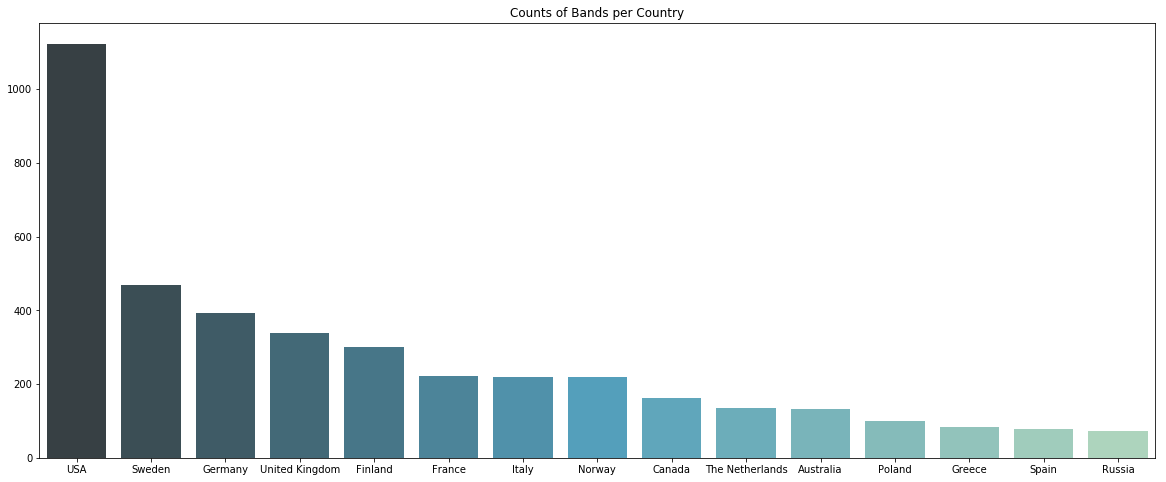

In [15]:
plt.figure(figsize=(20,8))
bands_country = metal['origin'].value_counts()
plt.title('Counts of Bands per Country')
sns.barplot(x=bands_country[:15].keys(), y=bands_country[:15].values, palette="GnBu_d")

#### I thought Scandinavia will win this battle, maybe it is a cuestion of demography

### Amount of bands per Genre

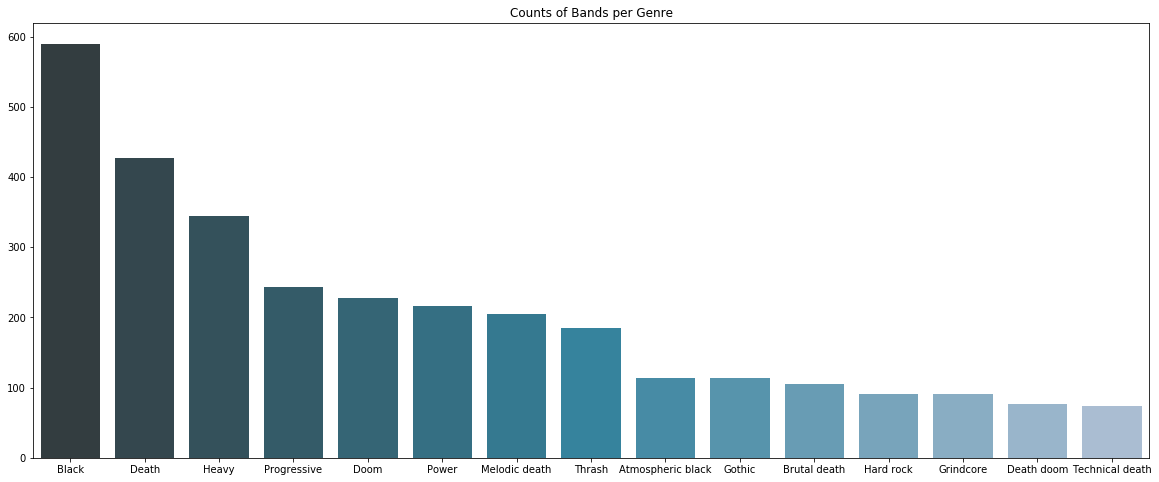

In [16]:
plt.figure(figsize=(20,8))
bands_genre = metal['main_genre'].value_counts()
plt.title('Counts of Bands per Genre')
sns.barplot(x=bands_genre[:15].keys(), y=bands_genre[:15].values, palette="PuBuGn_d")

#### Satan will be proud!

### Amount of bands per Year of Creation

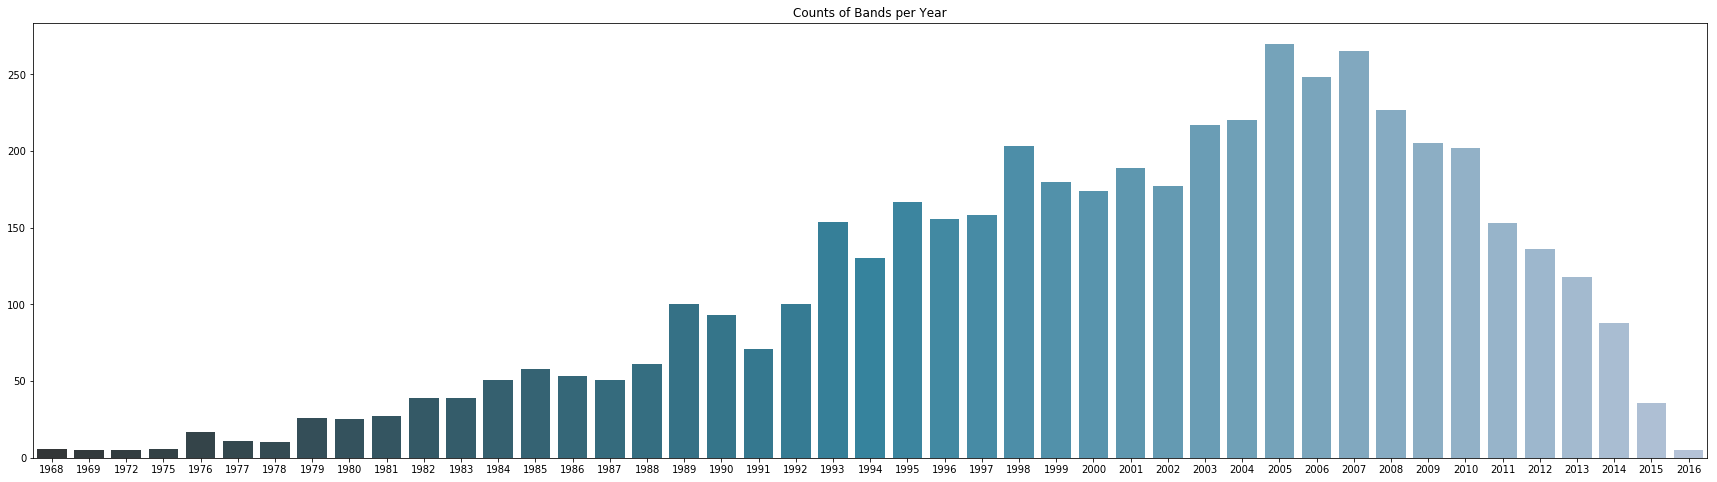

In [23]:
plt.figure(figsize=(30,8))
bands_year = metal['formed'].value_counts()
plt.title('Counts of Bands per Year')
sns.barplot(x=bands_year[:45].keys(), y=bands_year[:45].values, palette="PuBuGn_d")

#### There is a peak between 2005 and 2006, let's see which bands were formed there:

In [25]:
metal[(metal.fans >= 200) & (metal.formed.isin(['2005', '2006', '2007']))]

,band_name,fans,formed,origin,split,style,main_genre
176,Fleshgod Apocalypse,586,2007,Italy,-,Symphonic death,Symphonic death
220,Ihsahn,464,2005,Norway,-,"Extreme progressive,Avantgarde",Extreme progressive
238,Ghost Brigade,398,2005,Finland,-,"Post-metal,Alternative",Post-metal
252,Animals As Leaders,367,2007,USA,-,"Progressive,Instrumental,Djent",Progressive
267,Five Finger Death Punch,342,2005,USA,2005,Groove metal,Groove metal
271,Dethklok,337,2006,USA,2006,Melodic death,Melodic death
307,Haken,293,2007,United Kingdom,2007,Progressive,Progressive
343,Barren Earth,250,2007,Finland,2007,"Melodic death,Progressive",Melodic death
354,Cavalera Conspiracy,243,2007,USA,-,Thrash,Thrash
364,Kvelertak,238,2007,Norway,-,"Blackened hardcore,Punk",Blackened hardcore


#### Pretty cool bands huh!

## Animals As Leaders

In [27]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/NmfzWpp0hMc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Kvelertak

In [28]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/974E6IU_4I0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Cavalera Conspiracy

In [30]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/NLal1s6Wv_o" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### count the amount of fans grouping them by the year where the band was formed

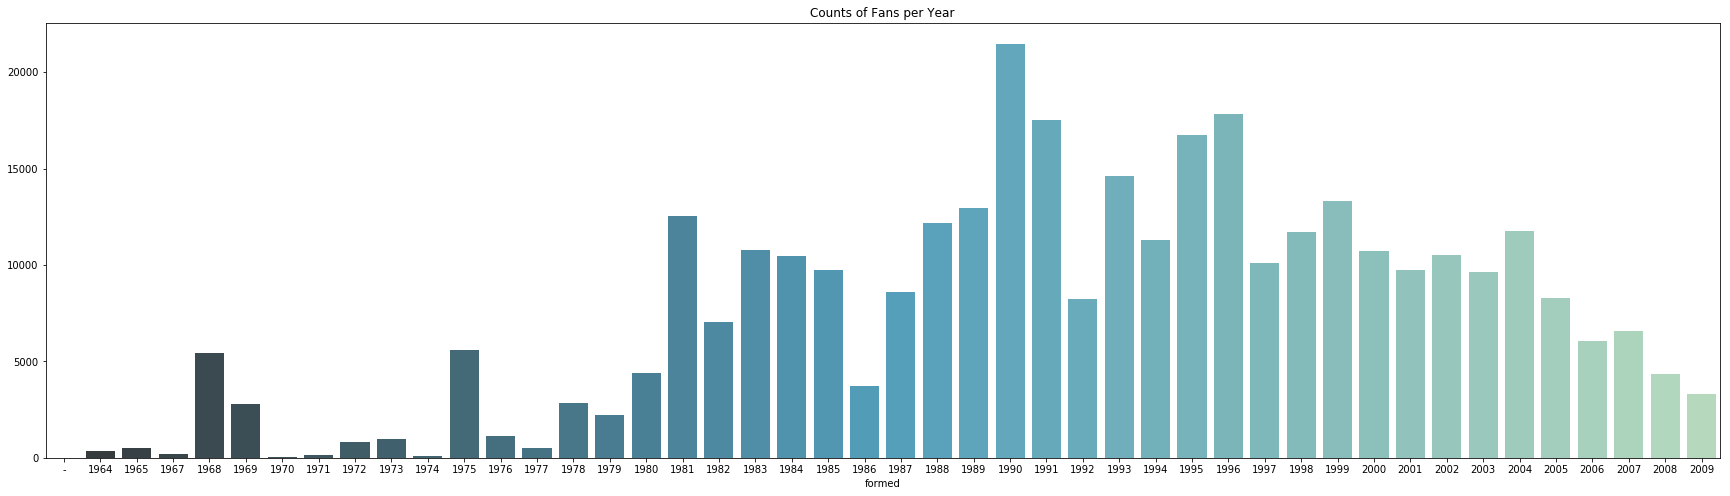

In [31]:
plt.figure(figsize=(30,8))
Fans_year = metal.groupby('formed')['fans'].sum()
plt.title('Counts of Fans per Year')
sns.barplot(x=Fans_year[:46].keys(), y=Fans_year[:46].values, palette="GnBu_d")

#### There is a peak between 1990 - 1991 and 1995 -1996, this could be a colateral effect of all the dark sounds that took place in scandinavia and the north of Europe "**A Blaze in the Northern Sky**". Let's see which bands with lots of fans were formed there:

In [34]:
metal[(metal.fans >= 1000) & (metal.formed.isin(['1990', '1991', '1995', '1996']))]

,band_name,fans,formed,origin,split,style,main_genre
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic",Symphonic power
13,In Flames,1932,1990,Sweden,1990,"Gothenburg,Alternative",Gothenburg
16,Agalloch,1881,1995,USA,2016,"Atmospheric black,Neofolk",Atmospheric black
17,Ensiferum,1879,1995,Finland,1995,Extreme folk,Extreme folk
18,Arch Enemy,1750,1996,Sweden,-,Gothenburg,Gothenburg
19,Katatonia,1735,1991,Sweden,1991,"Blackened doom,Death doom,Alternative rock,Got...",Blackened doom
20,Behemoth,1721,1991,Poland,-,"Death,Black,Blackened death",Death
25,Amorphis,1528,1990,Finland,1990,"Death,Melodic death,Folk,Progressive",Death
26,Kamelot,1520,1991,USA,-,Symphonic power,Symphonic power


#### Beautiful selection! let's listen some of them or go ahead and listen whatever you want.

## Anathema

In [36]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/CxY1B8mdGuA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Opeth

In [38]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/s_trbJ8T5lk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Behemoth

In [49]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/ji1tCcIgH5U" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Fans Over Time

### We can see here that the bands with more fans are the oldest and with the past of the time the newer bands have less and less fans over time

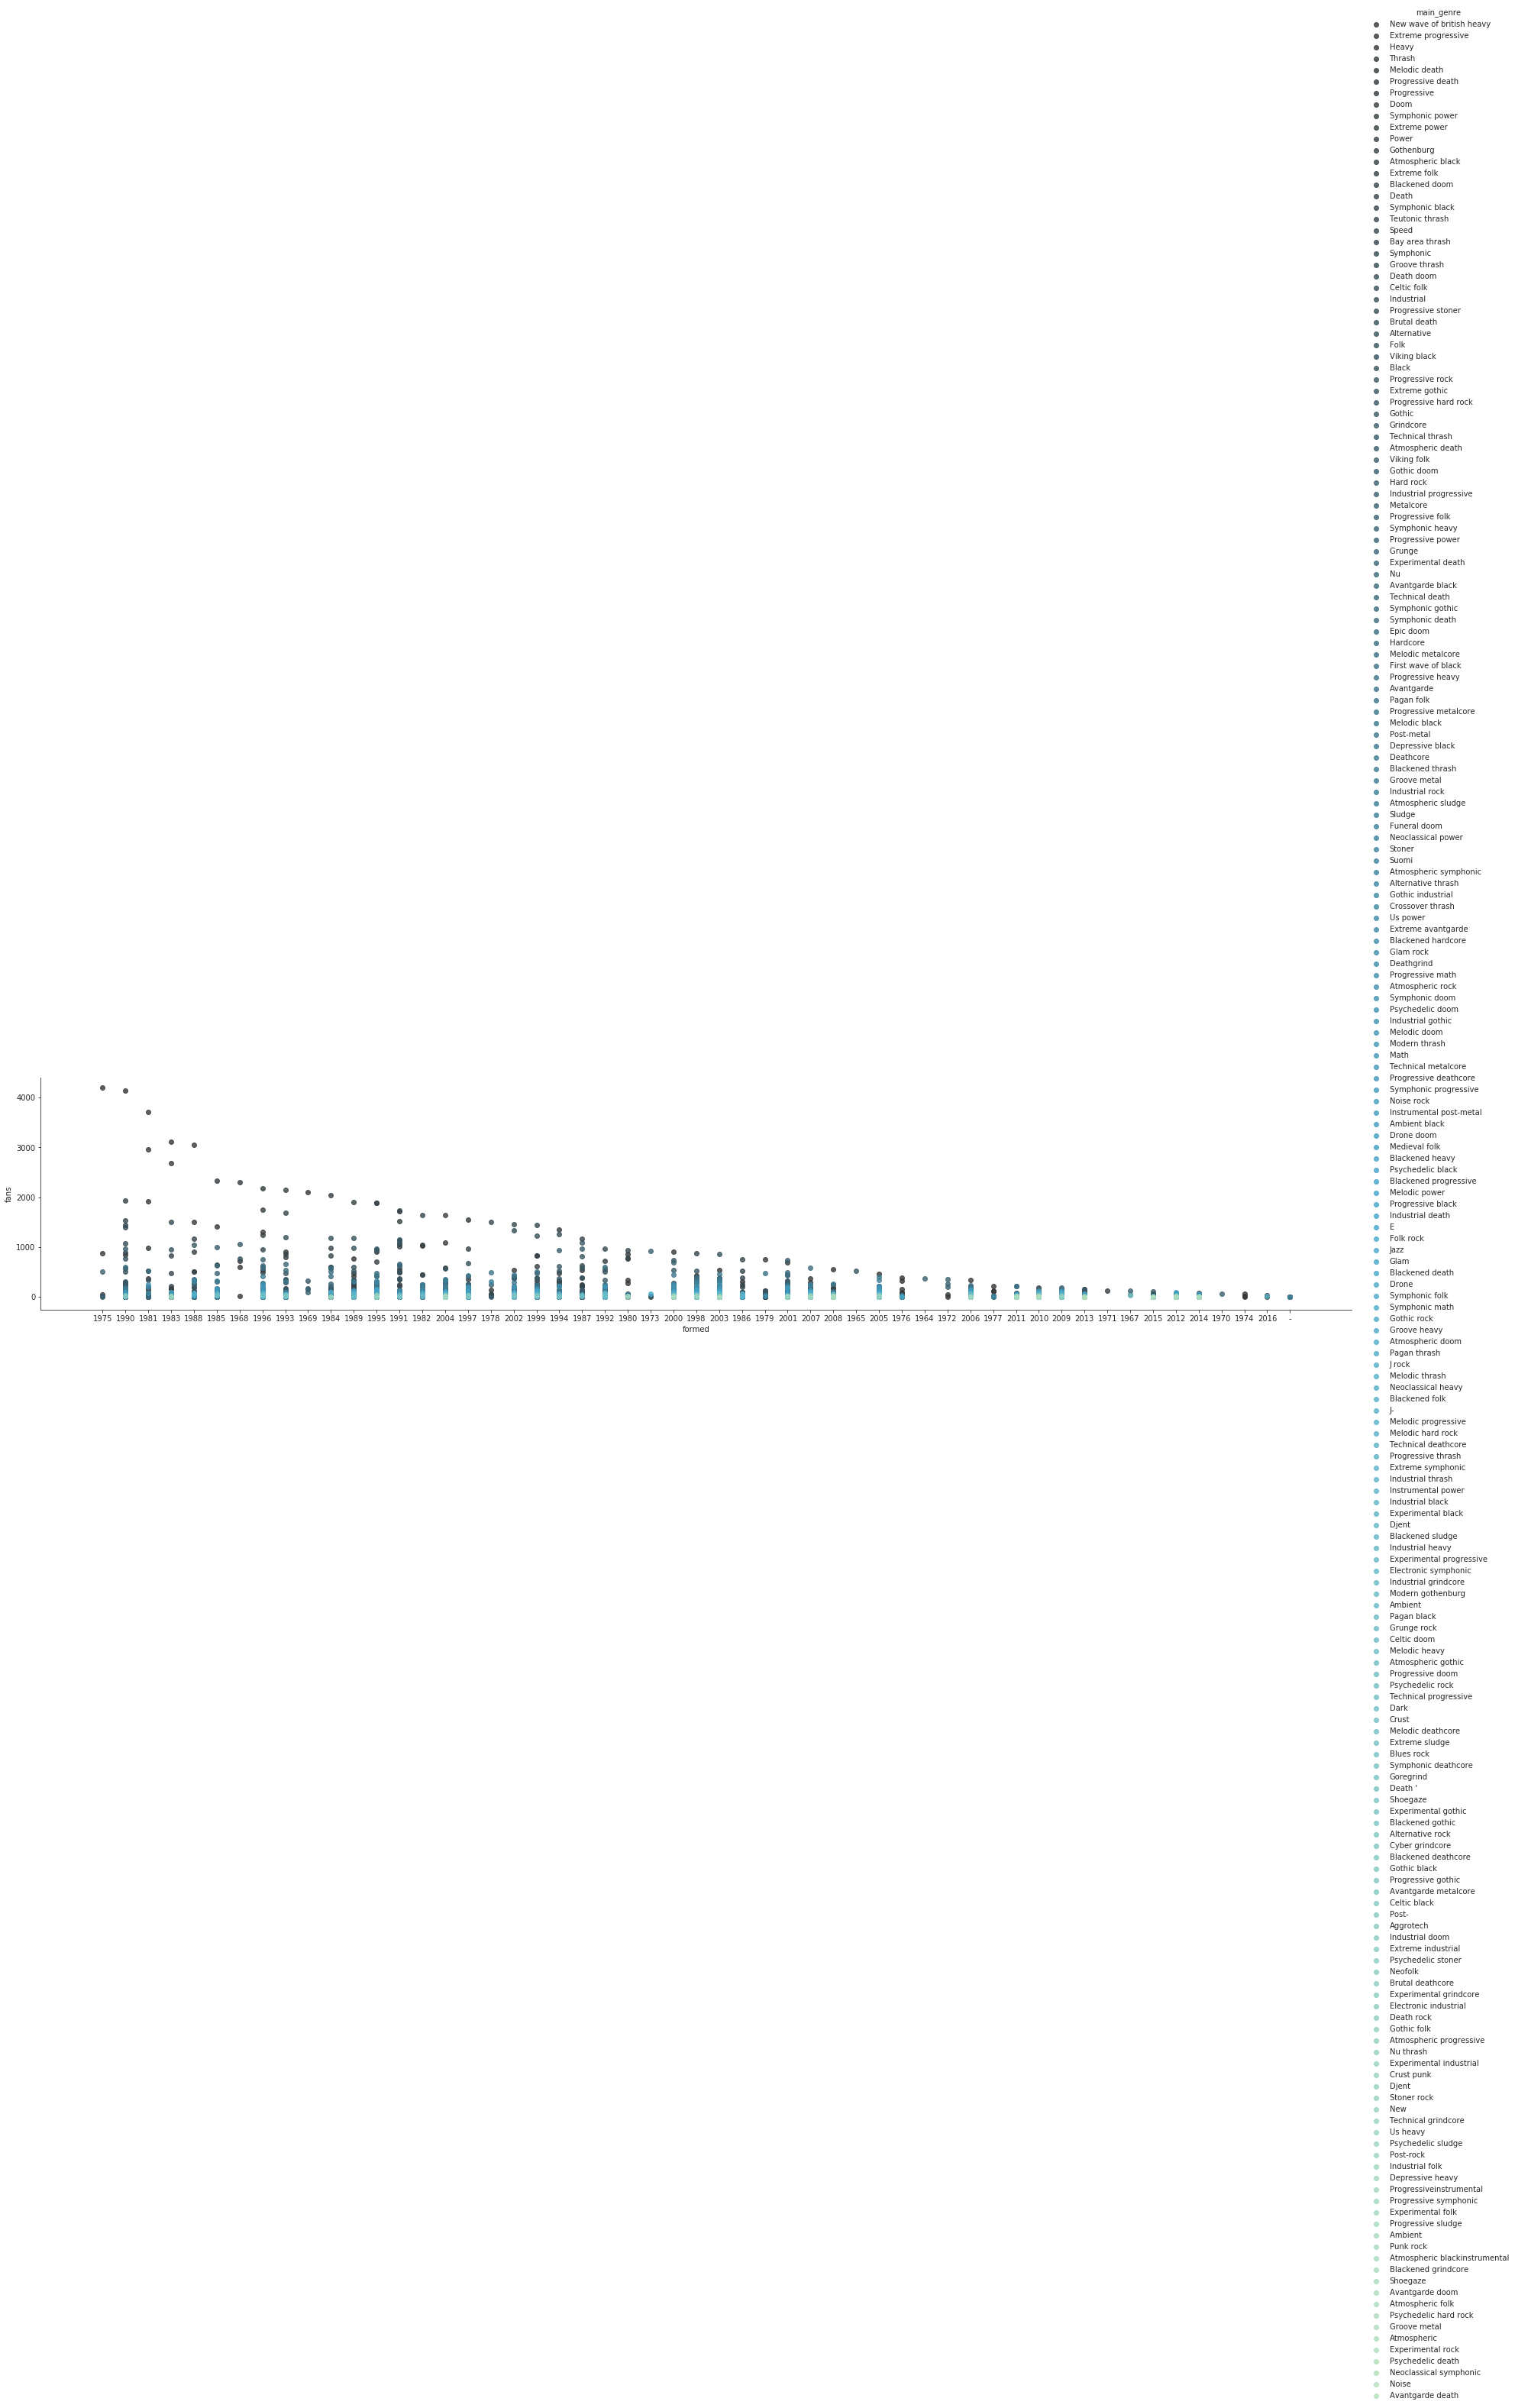

In [80]:
sns.lmplot(x="formed", y="fans", hue="main_genre", data=metal, fit_reg=False, height=5, aspect=5, palette="GnBu_d")

### Let's remember the pioneers

In [86]:
metal[(metal.fans >= 700) & (metal.formed <= '1970')]

,band_name,fans,formed,origin,split,style,main_genre
8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock",Doom
11,Judas Priest,2094,1969,United Kingdom,1969,"Heavy,Hard rock",Heavy
102,Led Zeppelin,1054,1968,United Kingdom,1980,"Progressive hard rock,Heavy,Blues rock",Progressive hard rock
145,Rush,767,1968,Canada,1968,Progressive rock,Progressive rock
151,Deep Purple,714,1968,United Kingdom,1968,"Heavy,Hard rock",Heavy


## Black Sabbath

In [88]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/wQi1Uvz6qRs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Deep Purple

In [89]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/q88koeaqrEg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Led Zepellin

In [90]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/9_kqkZTZYrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Rush

In [92]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZiRuj2_czzw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Judas Priest

In [91]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/nM__lPTWThU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>